In [1]:
import torch

import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
#import zipfile
#import io
#zf = zipfile.ZipFile(io.BytesIO(uploaded['data.zip']), "r")
#zf.extractall()

#print(zf.infolist())

In [4]:
x_train = np.load('X_train.npy', encoding='bytes')
y_train = np.loadtxt('input/train_labels.csv', delimiter=',', skiprows=1, dtype='str')

#x_test = np.load('X_test.npy', encoding='bytes')
middle = x_train.shape[0] // 2
x_train, x_test = x_train[:middle], x_train[middle:]
y_train, y_test = y_train[:middle, 1], y_train[middle:, 1]
#middle = x_train.shape[0] // 2
#x_train, x_test = x_train[:500], x_train[500:1000]
#y_train, y_test = y_train[:500, 1], y_train[500:1000, 1]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 10000)
(5000,)
(5000, 10000)
(5000,)


Le code suivant est adapté du tp d'introduction à PyTorch de IFT 3395

In [5]:
#iris = datasets.load_iris()

# separer dans train/test avec sklearn
#(x_train, x_test, y_train, y_test) = train_test_split(iris.data, iris.target)

num_train = x_train.shape[0]
num_test = x_test.shape[0]
num_features = x_train.shape[1]
num_classes = 31

# encodage one-hot
# e.g. 1 -> [0, 1, 0], 2 -> [0, 0 ,1]  
one_hot = OneHotEncoder(sparse=False)
y_train = one_hot.fit_transform(y_train.reshape(-1,1))
y_test = one_hot.transform(y_test.reshape(-1,1))

In [6]:
# I have an amd gpu :(
#device = torch.device('cuda:0')    # we use 0 to specify the first GPU

In [7]:
x_train = torch.from_numpy(x_train).float() #.to(device)
x_test = torch.from_numpy(x_test).float() #.to(device)
y_train = torch.from_numpy(y_train).float() #.to(device)
y_test = torch.from_numpy(y_test).float() #.to(device)

In [8]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)

#
# OK, la régression logistique c'est en gros un réseau d'un neurone, non?
#     Alors si on le répète une fois pour chaque classe c'est plus ou moins
#     un réseau de neurone d'une seule couche avec un neurone par classe.
#     (À savoir un algo linéaire répèter pour chaque classe et on prend le max.)
#
model = torch.nn.Sequential(
    torch.nn.Linear(num_features, num_classes, False),
    torch.nn.Sigmoid()
) #.to(device)

loss_fn = torch.nn.MSELoss()

num_epochs = 500
learning_rate = 2e-5
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []

for epoch in range(num_epochs):
    preds = model(x_train)
    loss = loss_fn(preds, y_train)

    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'mean squared loss')

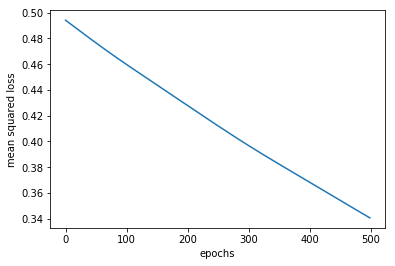

In [9]:
%pylab inline

plot(range(num_epochs), losses)
xlabel('epochs')
ylabel('mean squared loss')

In [10]:
torch.save(model.state_dict(), 'model-x_train-5000')

In [11]:
preds = model(x_test)
loss = loss_fn(preds, y_test)

print('mean squared loss on test data %.7f %%' % (loss * 100.0))

#
# 5000 train, 5000 test, 500 epoch, 2e-5 learning rate
#     mean squared loss on test data 34.0440140 %
#

mean squared loss on test data 34.0440140 %
